In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('Dataset/banknotes.csv')

In [24]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


##### Separate the input and output variables

In [25]:
# input features
x = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]  # Alternatively, x=df.drop('Class', axis =1)

# output features
y = df['Class']

In [26]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [27]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b6a0c3d810>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.54%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.46%')])

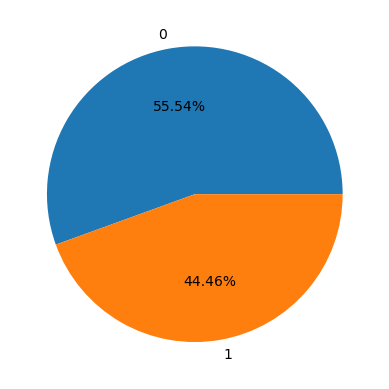

In [28]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct ='%2.2f%%')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


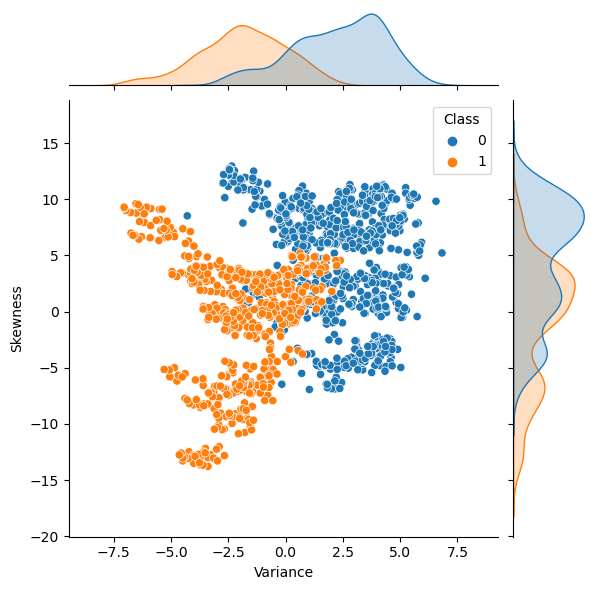

In [29]:
sns.jointplot(x='Variance', y='Skewness', data = df, hue = 'Class')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

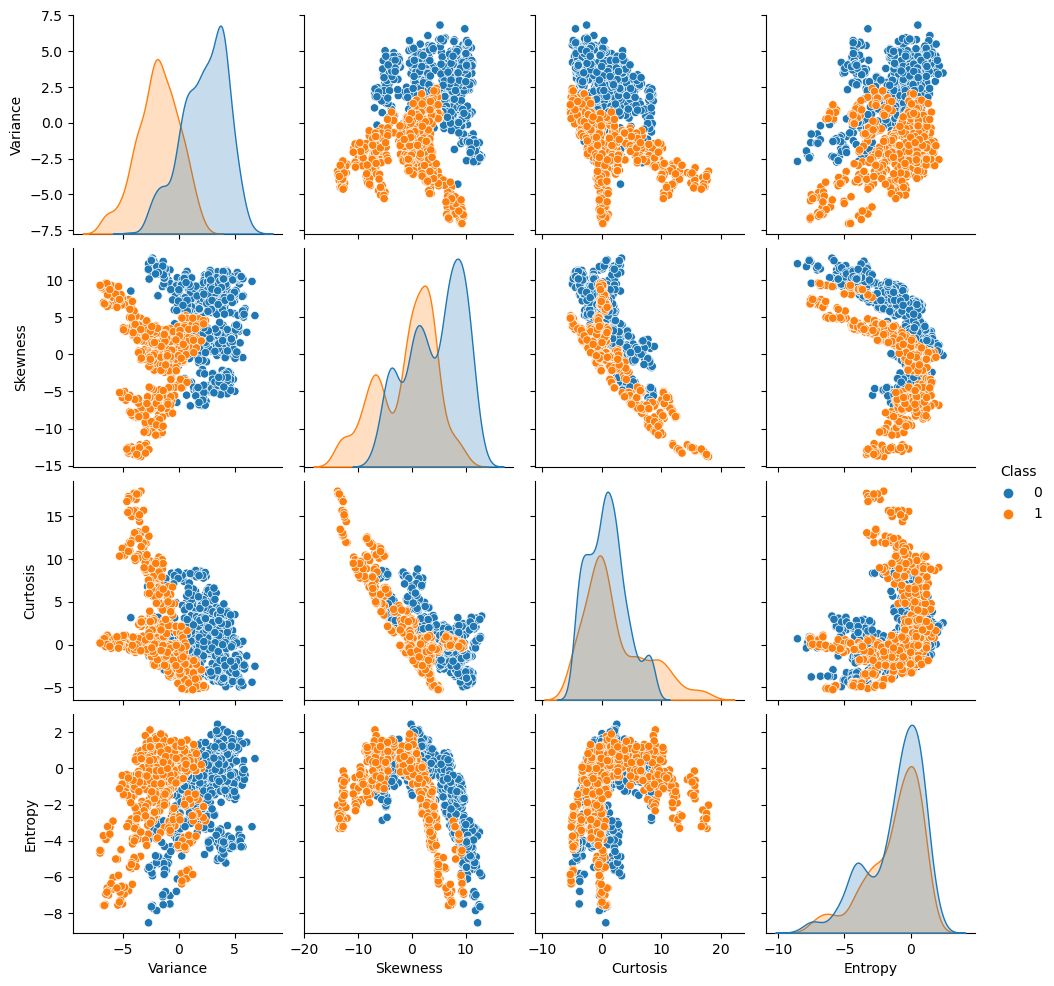

In [30]:
sns.pairplot(df, hue ='Class')

In [31]:
# decision tree will automatically select which feature to select so that classification is maximum. Here it is variance and skewness

##### Cross Validation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [34]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

##### Build the model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [37]:
%%time
clf_tree.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


DecisionTreeClassifier(random_state=0)

##### Performance Evaluation

In [38]:
y_pred = clf_tree.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [40]:
print(confusion_matrix(y_test, y_pred))

[[191   4]
 [  3 145]]


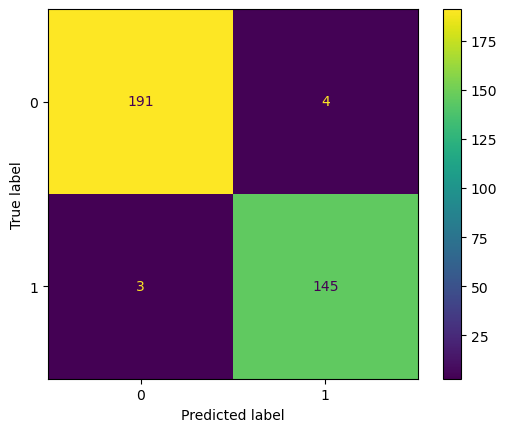

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [42]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



##### Visualize the tree

In [44]:
from sklearn.tree import plot_tree

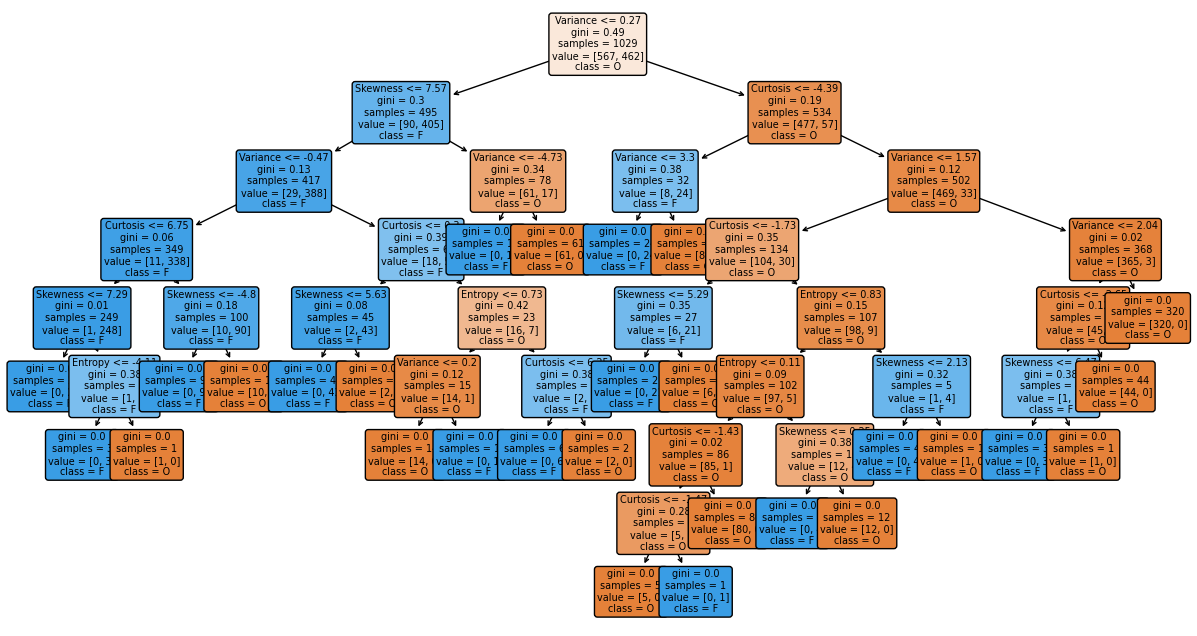

In [45]:
plt.figure(figsize=(15,8))
plot_tree(clf_tree, fontsize = 7, feature_names=x.columns, filled = True, precision = 2, class_names = ['O', 'F'], rounded = True); # Output is supressed if we put a semicolon at the end of function
plt.savefig('tree.png')

<BarContainer object of 4 artists>

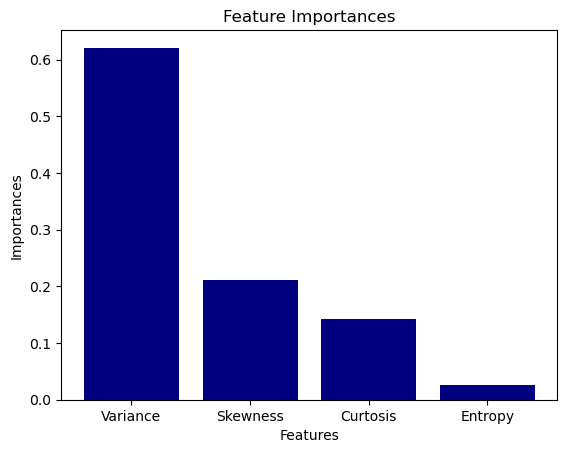

In [46]:
# To print decision tree gives importance to which importance
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.bar(x.columns, clf_tree.feature_importances_, color = 'navy')

In [ ]:
# Prediction based on user input
var = float(input('Enter the variance: '))

skw = float(input('Enter the Skewness: '))

crt = float(input('Enter the Curtosis: '))

ent = float(input('Enter the entropy: '))

new = pd.DataFrame({'Variance': [var],'Skewness': [skw], 'Curtosis': [crt], 'Entropy': [ent]})

y_pred = clf_tree.predict(new) # Doing the prediction

if(y_pred[0] == 0):
    print('Original Note')
else:
    print('Fake Note')

In [ ]:
new = pd.DataFrame(data=[[3.45660, 9.52280, -4.0112, -3.59440],
                         [0.40614, 1.34920, -1.4501, -0.55949],
                         [3.86600, -2.63830, 1.9242, 0.10645]], columns = x.columns)

In [ ]:
new

In [ ]:
y_pred = clf_tree.predict(new)

In [ ]:
for i in y_pred:
    if(y_pred[i] == 0):
        print('Original Note')
    else:
        print('Fake Note')